# Introduction to Optimization


Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/statcomp](https://feng.li/statcomp)


In [3]:
options(jupyter.plot_scale=0.8)

## Motivation: Why Optimize?

### Optimization in Business

-   Many problems in business require something to be minimized or
    maximized

    -   Maximizing Revenue

    -   Minimizing Costs

    -   Minimizing Delivery Time

    -   Maximizing Financial Returns

### Input and output

-   For many of these problems there is some control over the input

    -   Maximizing Revenue - Price

    -   Minimizing Costs - Number of Workers

    -   Minimizing Delivery Time - Driving Route

    -   Maximizing Financial Returns - Portfolio weights

### Optimization in Statistics

-   In statistics, many estimators maximize or minimize a function

    -   Maximum Likelihood

    -   Least Squares

    -   Method of Moments

    -   Posterior Mode

-   Suppose we want to find an minimum or maximum of a function $f(x)$

-   Sometimes $f(x)$ will be very complicated

-   Are there computer algorithms that can help?

-   YES!

    -   Newton’s Method

    -   Quasi-Newton

    -   Nelder Mead


## Newton’s Method

### Finding a root


-   Consider the problem of finding the **root** or **zero** a function.

-   For the function $g(x)$ the **root** is the point $x^*$ such that
    $g(x^*)=0$

-   An algorithm for solving this problem was proposed by Newton and
    Raphson nearly 500 years ago.

-   We will use this algorithm to find the root of
    $g(x)=3x^5-4x^4+6x^3+4x-4$



In [4]:
gx<-function(x){
  y=(3*(x^5))-(4*(x^4))+(6*(x^3))+(4*x)-4
  return(y)  
}

dgx<-function(x){
  y=(15*(x^4))-(16*(x^3))+(18*(x^2))+4
  return(y)  
}

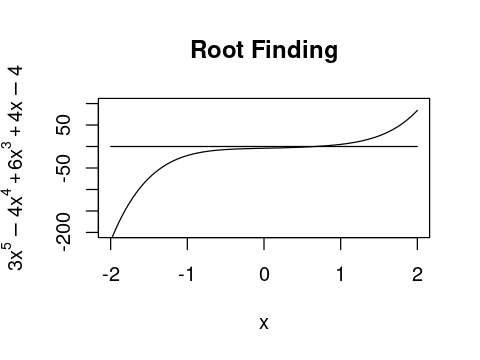

In [12]:
gridx<-seq(-2,2,0.01)
gridy<-gx(gridx)
plot(gridx,gridy,"l",main='Root Finding', ylim= c(-200, 100), 
     xlab = 'x', ylab=expression(y=3*x^5-4*x^4+6*x^3+4*x-4))
lines(c(-2,2),c(0,0))

### Finding the Tangent

-   To find the tangent evaluate the first derivative of $g(x)$.

-   The function is $$g(x)=3x^5-4x^4+6x^3+4x-4$$

-   The first derivative is $$g'(x)=15x^4-16x^3+18x^2+4$$


![rootfinding](figures/rf7.png)

### Find the crossing point

- Find the crossing point From basic Geometry

$$g'(x_0)=\frac{g(x_0)}{x_0-x_1}$$


- Rearrange

$$\begin{aligned}
    x_0-x_1&=\frac{g(x_0)}{g'(x_0)}\\
    -x_1&=-x_0+\frac{g(x_0)}{g'(x_0)}\\
    x_1&=x_0-\frac{g(x_0)}{g'(x_0)}
  \end{aligned}$$

### Stopping Rule

-   With each step the algorithm should get closer to the root.

-   However, it can run for a long time without reaching the **exact**
    root

-   There must be a **stopping rule** otherwise the program could run
    forever.

-   Let $\epsilon$ be an extremely small number e.g. $1\times 10^{-10}$
    called the **tolerance level**

-   If $|g(x^*)|<\epsilon$ then the solution is close enough and there
    is a root at $x^*$

### Newton-Raphson algorithm for root finding

1.  Select initial value $x_0$ and set $n=0$

2.  Set $x_{n+1}=x_{n}-\frac{g(x_n)}{g'(x_n)}$

3.  Evaluate $|g(x_{n+1})|$

    -   If $|g(x_{n+1})|\leq\epsilon$ then stop.

    -   Otherwise set $n=n+1$ and go back to step 2.

### Your task:  Write R/Python code to find the root

$g(x)=3x^5-4x^4+6x^3+4x-4$

Tips:

-   Write functions for $g(x)$ and $g'(x)$ first.

-   These can be inputs into a function that carries out the Newton
    Raphson method. Code should be flexible.

-   Use loops!

### Your task: a different target function

-   Now use your Newton-Raphson code to find the root of
    $g(x)=\sqrt{|x|}$

-   The derivative has two parts $$g'(x)=\left\{
            \begin{array}{l}
              1/(2\sqrt{x})\quad\mbox{if $x>0$}\\
              -1/(2\sqrt{-x})\quad\mbox{if $x<0$}
            \end{array}
          \right.$$

-   Use 0.25 as the starting value.

### Learn from mistakes

-   Newton-Raphson does not always converge

-   Be careful using *while*. Avoid infinite loops.

-   Don’t always assume the answer given by code is correct. Check
    carefully!

-   Print warning messages in code

-   For some functions, using some certain starting values leads to a
    series that **converges**, while other starting values lead to a
    series that **diverges**

-   For other functions different starting values converge to different
    roots.

-   Be careful when choosing the initial value.

-   Newton-Raphson doesn’t work if the first derivative is zero.

-   When can this happen?

### Rough Proof of Quadratic Convergence

-   Can we prove anything about the rate of convergence for the Newton
    Raphson Method?

-   To do so requires the **Taylor Series**

-   Let $f(x)$ have a root at $\alpha$. The Taylor approximation states
    that

    $$f(\alpha)\approx f(x_n)+f'(x_n)(\alpha-x_n)+\frac{1}{2}f''(x_n)(\alpha-x_n)^2$$

-   The quality of the approximation depends on the function and how
    close $x_n$ is to $\alpha$


-   Since $\alpha$ is a root, $f(\alpha)=0$ This implies

    $$0\approx f(x_n)+f'(x_n)(\alpha-x_n)+\frac{1}{2}f''(x_n)(\alpha-x_n)^2$$

-   Dividing by $f'(x_n)$ and rearranging gives:
    $$\frac{f(x_n)}{f'(x_n)}+(\alpha-x_n)\approx\frac{-f''(x_n)}{2f'(x_n)}(\alpha-x_n)^2$$

-   More rearranging
    $$\alpha-\left(x_n-\frac{f(x_n)}{f'(x_n)}\right)\approx\frac{-f''(x_n)}{2f'(x_n)}(\alpha-x_n)^2$$

-   The term in brackets on the left hand side is the formula used to
    update $x$ in the Newton Raphson method
    $$(\alpha-x_{n+1})\approx\frac{-f''(x_n)}{2f'(x_n)}(\alpha-x_n)^2$$

-   This can be rewritten in terms of errors $e_{n+1}=\alpha-x_{n+1}$
    and $e_n=\alpha-x_n$
    $$e_{n+1}\approx\frac{-f''(x_n)}{2f'(x_n)}e_n^2$$

### Conclusion

-   Why did we spend so much time on finding roots of an equation?

-   Isn’t this topic meant to be about optimization?

-   Can we change this algorithm slightly so that it works for
    optimization?